# 线性模型 Linear Model

<!-- TODO Linear model -->

1。线性模型, 是统计学习和机器学习的基础。

线性模型的形式很简单，$Y=W^{T}\cdot X + b$。 
对于**分类任务**，就是选择合适的$W$和$b$,使得数据集中的数据分别位于分界（超）平面的两侧；
对于**回归任务**，找到合适的$W$和$b$,使得数据集中的数据尽量位于回归面的附近。

### 线性回归 Linear Regression

首先构造数据集（x,y），$$y = a*x + b+ \epsilon$$
其中$\epsilon$ (np.random.randn((m,n)))为随机扰动项，来模拟现实数据中的各种加行扰动。

In [8]:
import numpy as np
np.random.seed(24) # for reproduction
a = 5
b = 1 
x = np.linspace(0,2,100)
epsilon = np.random.randn(len(x))
y = a*x + b + epsilon

#### 理论计算(极大似然估计）：
假设$\epsilon^{i}$为I.I.D.的Guassian分布，均值为0， 方差为$\delta^{2}$。即：$$p(\epsilon^{i})=\frac{1}{\sqrt{2\pi}\delta}exp(-\frac{(\epsilon^{(i)})^{2}}{2\delta^{2}})$$
对于第i个数据$ y^{(i)}= W^{T}\cdot{x^{(i)}}+ \epsilon^{(i)}$的条件概率$p(y^{(i)}|x^{(i)};\theta)$为
$$p(y^{(i)}|x^{(i)};\theta) = \frac{1}{\sqrt{2\pi}\delta}exp(-\frac{(y^{(i)}-W^{T}\cdot x^{(i)})^{2}}{2\delta^{2}})$$
应用拉格朗日乘子来计算$W$的似然估计:
$$L(w) =\prod_{i=1}^{m} p(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi}\delta}exp(-\frac{(y^{(i)}-W^{T}\cdot x^{(i)})^{2}}{2\delta^{2}})$$
取其对数$l(w) = ln(L(w))$， 则有$$l(w) = -m log(\sqrt{2\pi}\delta) - \frac{1}{2\delta^{2}}\sum_{i=1}^{m}(y^{(i)}-W^{T}x^{(i)})^{2}$$
去除常数项和系数，可令：
$$J(w) = \sum_{i=1}^{m}(y^{(i)}-W^{T}x^{(i)})^{2}$$

根据极大似然估计，最优解$w^{*}=arg\_min_{w}J(w)$

$J(w)$是简单的凸函数，其最优解必为梯度为0的点，由
$\triangledown_{w}J(w)=X^{T}XW-X^{T}Y=0$可得
$$W = (X^{T}X)^{-1}X^{T}Y$$

>注：矩阵取逆的复杂度为$O(n^{2.4})$~$O(n^{3})$之间

为了计算方便，把$b$吸收到W中，作为$x^{0}$的系数，相应的在X中添加对应的列。

In [13]:
X_b = np.c_[np.ones((len(x),1)),x] # np.c_[] not np.c_(）

In [15]:
w_star = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(w_star)

[ 1.17970383  4.92454819]


计算结果，最佳估计参数 $b=1.18, a = 4.92$

对比numpy中的多项式拟合np.ployfit()，两者结果相同（p中高次项在前）。

In [57]:
p,_=np.polyfit(x,y,1,cov=True) 
p[::-1]

array([ 1.17970383,  4.92454819])

点到直线距离：
$$ d= \frac{|Ax+By+C|}{\sqrt{A^{2}+B^{2}}}$$

In [60]:
d = w_star[1]*x - y + w_star[0]  # regardless of real distance, just for max value postion
postion = [np.where(d==d.min())[0],np.where(d==d.max())[0]]
line_max = [w_star[1]*x+y[i]-w_star[1]*x[i] for i in postion]
# y_lp = w_star[1]*x+y_p-w_star[1]*x_p
# y_ln = w_star[1]*x+y_n-w_star[1]*x_n

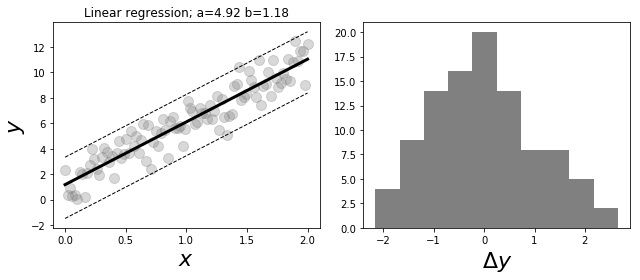

In [59]:
%matplotlib inline
from matplotlib.pylab import subplots


fig,axs=subplots(1,2)
fig.set_size_inches((9,4))
_=ax =axs[0]
_=ax.plot(x,y,'o',alpha=.3,color='gray',ms=10)
_=ax.plot(x,y_,color='k',lw=3)
# _=ax.plot(x,y_lp, '--',color='k', lw=1)
# _=ax.plot(x,y_ln, '--',color='k', lw=1)
_=ax.plot(x,line_max[0], '--',color='k', lw=1)
_=ax.plot(x,line_max[1], '--',color='k', lw=1)
_=ax.set_xlabel("$x$",fontsize=22)
_=ax.set_ylabel("$y$",fontsize=22)
_=ax.set_title("Linear regression; a=%3.3g b=%3.3g"%(p[0],p[1]))
_=ax = axs[1]
_=ax.hist(y_-y,color='gray')
_=ax.set_xlabel(r"$\Delta y$",fontsize=22)
fig.tight_layout()

1.appropriate model
2.trianing algorithm
3.a good set of hyperparameters